In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Read the data
games_df = pd.read_csv('/content/basketball_games.csv')
players_df = pd.read_csv('/content/basketball_players - basketball_players.csv')
# Convert Date to datetime
games_df['Date'] = pd.to_datetime(games_df['Date'])
games_df

,Game_ID,Date,Opponent,Location,Team_Points,Opponent_Points,Attendance,Result
0,1,2024-01-01,Lakers,Home,91,101,2010,Loss
1,2,2024-01-08,Celtics,Away,104,100,2181,Win
2,3,2024-01-15,Bulls,Home,113,81,1975,Win
3,4,2024-01-22,Heat,Away,99,103,2199,Loss
4,5,2024-01-29,Knicks,Home,95,91,2475,Win
5,6,2024-02-05,Warriors,Away,92,109,2282,Loss
6,7,2024-02-12,Rockets,Home,113,85,1689,Win
7,8,2024-02-19,Spurs,Away,105,81,2457,Win
8,9,2024-02-26,Mavericks,Home,91,107,2186,Loss
9,10,2024-03-04,Nets,Away,110,100,2457,Win


1

1. Team's Points Score Over the Season:


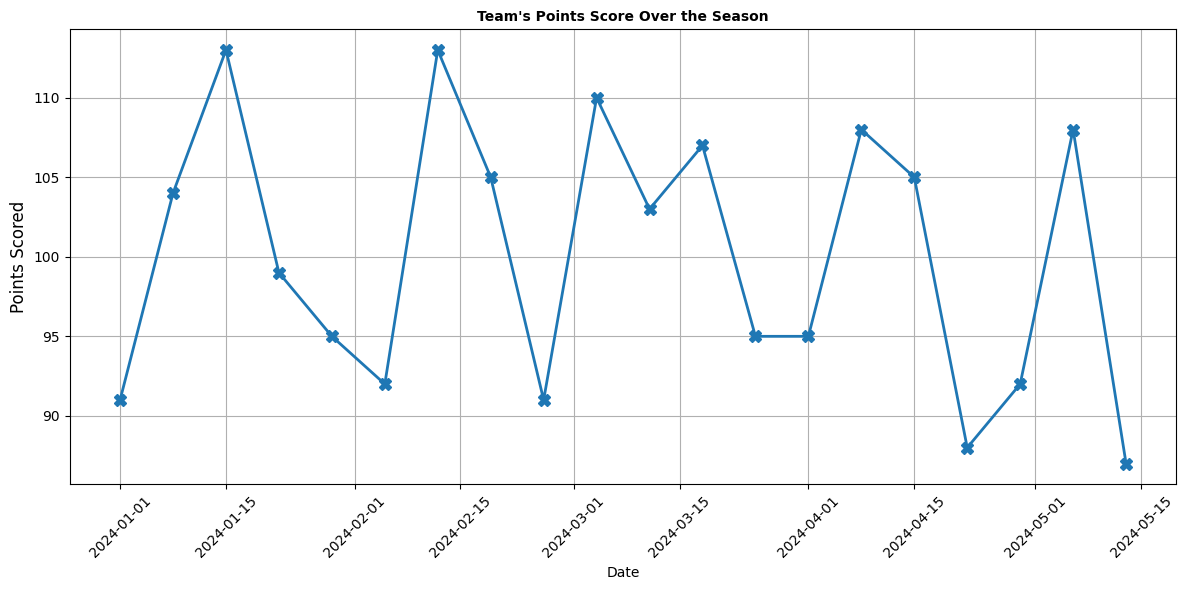

In [4]:
print("1. Team's Points Score Over the Season:")
plt.figure(figsize=(12, 6))
plt.plot(games_df['Date'], games_df['Team_Points'], marker='X', linewidth=2, markersize=8)
plt.title("Team's Points Score Over the Season", fontsize=10, fontweight='bold')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Points Scored', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:

trend = np.polyfit(range(len(games_df)), games_df['Team_Points'], 1)[0]
trend_direction = "improving" if trend > 0 else "declining" if trend < 0 else "stable"
print(f"   Points trend: {trend_direction} (slope: {trend:.2f})")

   Points trend: declining (slope: -0.26)


2


2. Average Attendance: 2128 people
   Highest Attendance: 2475 people
   Lowest Attendance: 1630 people


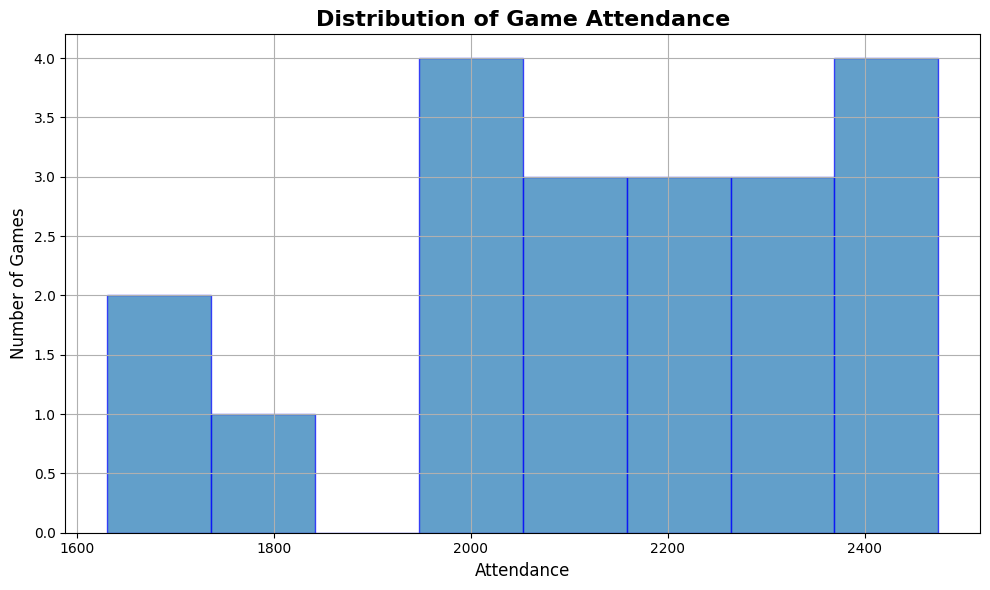

In [8]:
print(f"\n2. Average Attendance: {games_df['Attendance'].mean():.0f} people")
print(f"   Highest Attendance: {games_df['Attendance'].max():.0f} people")
print(f"   Lowest Attendance: {games_df['Attendance'].min():.0f} people")
plt.figure(figsize=(10, 6))
plt.hist(games_df['Attendance'], bins=8, alpha=0.7, edgecolor='blue')
plt.title('Distribution of Game Attendance', fontsize=16, fontweight='bold')
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

3. Which player scored the most points over the season? Create a bar chart showing the total points scored by each player.


3. Top Scorer: Jordan with 646 total points


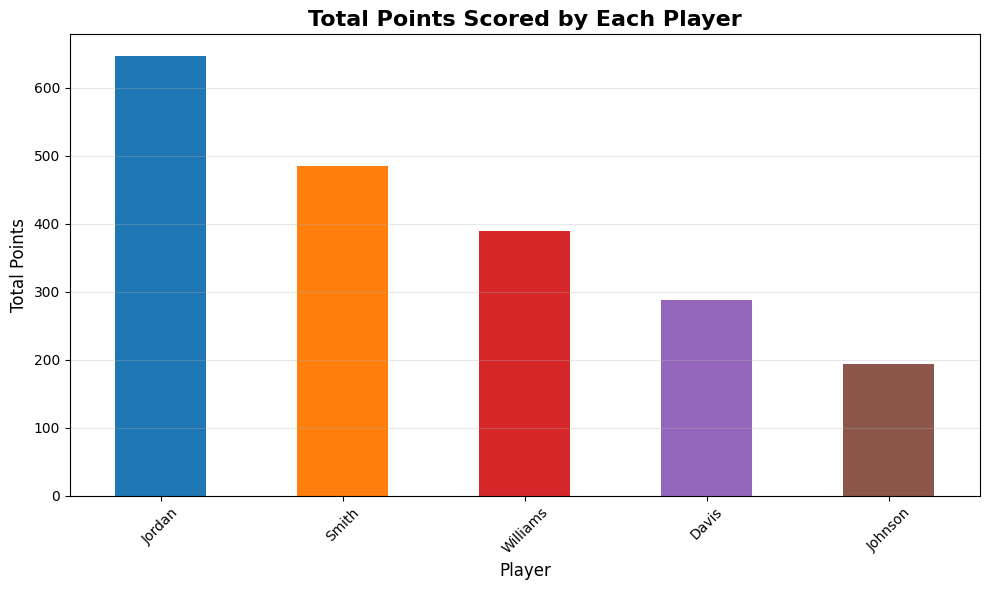

In [9]:
player_points = players_df.groupby('Player')['Points'].sum().sort_values(ascending=False)
top_scorer = player_points.index[0]
top_score = player_points.iloc[0]

print(f"\n3. Top Scorer: {top_scorer} with {top_score} total points")

plt.figure(figsize=(10, 6))
player_points.plot(kind='bar', color=['#1f77b4','#ff7f0e','#d62728','#9467bd','#8c564b','#e377c2'])
plt.title('Total Points Scored by Each Player', fontsize=16, fontweight='bold')
plt.xlabel('Player', fontsize=12)
plt.ylabel('Total Points', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

4


 Games scoring above 100 points: 10/20


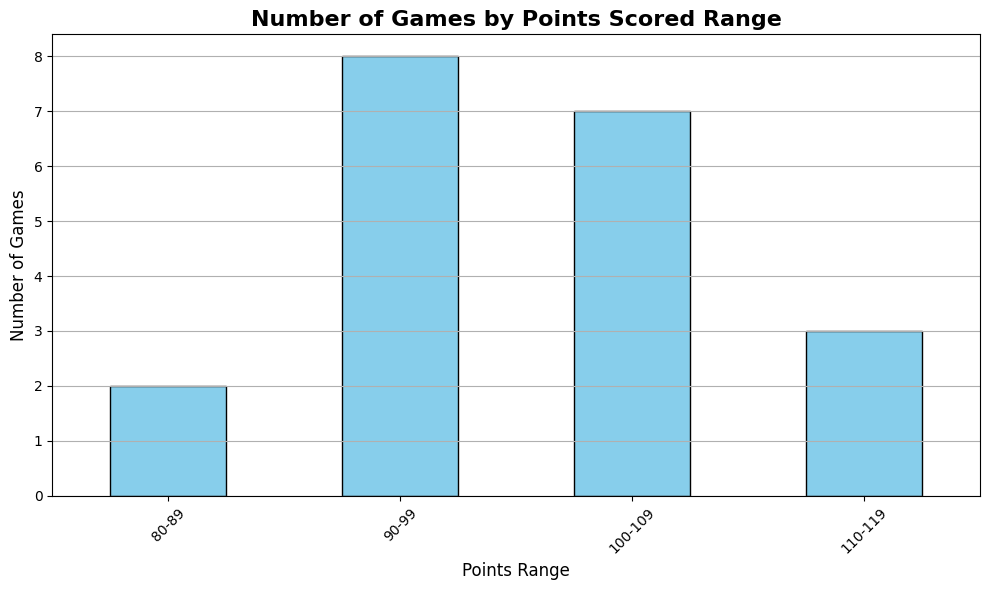

In [10]:
threshold = 100
games_above_threshold = len(games_df[games_df['Team_Points'] > threshold])
print(f"\n Games scoring above {threshold} points: {games_above_threshold}/{len(games_df)}")

bins = [80, 90, 100, 110, 120]
labels = ['80-89', '90-99', '100-109', '110-119']
games_df['Point_Range'] = pd.cut(games_df['Team_Points'], bins=bins, labels=labels, right=False)
point_range_counts = games_df['Point_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
point_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Games by Points Scored Range', fontsize=16, fontweight='bold')
plt.xlabel('Points Range', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

5

In [11]:
opponent_performance = games_df.groupby('Opponent').agg({
    'Team_Points': 'mean',
    'Result': lambda x: (x == 'Win').sum()
}).round(1)
opponent_performance.columns = ['Avg_Points_Against', 'Wins']
opponent_performance = opponent_performance.sort_values('Avg_Points_Against', ascending=False)

print(f"\nTeam Performance Against Opponents (by average points scored):")
for opponent, row in opponent_performance.iterrows():
    print(f"   {opponent}: {row['Avg_Points_Against']} avg points, {row['Wins']} wins")




Team Performance Against Opponents (by average points scored):
   Bulls: 113.0 avg points, 1.0 wins
   Rockets: 113.0 avg points, 1.0 wins
   Nets: 110.0 avg points, 1.0 wins
   Grizzlies: 108.0 avg points, 1.0 wins
   Jazz: 108.0 avg points, 0.0 wins
   76ers: 107.0 avg points, 1.0 wins
   Spurs: 105.0 avg points, 1.0 wins
   Trail Blazers: 105.0 avg points, 1.0 wins
   Celtics: 104.0 avg points, 1.0 wins
   Bucks: 103.0 avg points, 1.0 wins
   Heat: 99.0 avg points, 0.0 wins
   Knicks: 95.0 avg points, 1.0 wins
   Suns: 95.0 avg points, 0.0 wins
   Raptors: 95.0 avg points, 0.0 wins
   Warriors: 92.0 avg points, 0.0 wins
   Clippers: 92.0 avg points, 0.0 wins
   Lakers: 91.0 avg points, 0.0 wins
   Mavericks: 91.0 avg points, 0.0 wins
   Nuggets: 88.0 avg points, 0.0 wins
   Hawks: 87.0 avg points, 0.0 wins


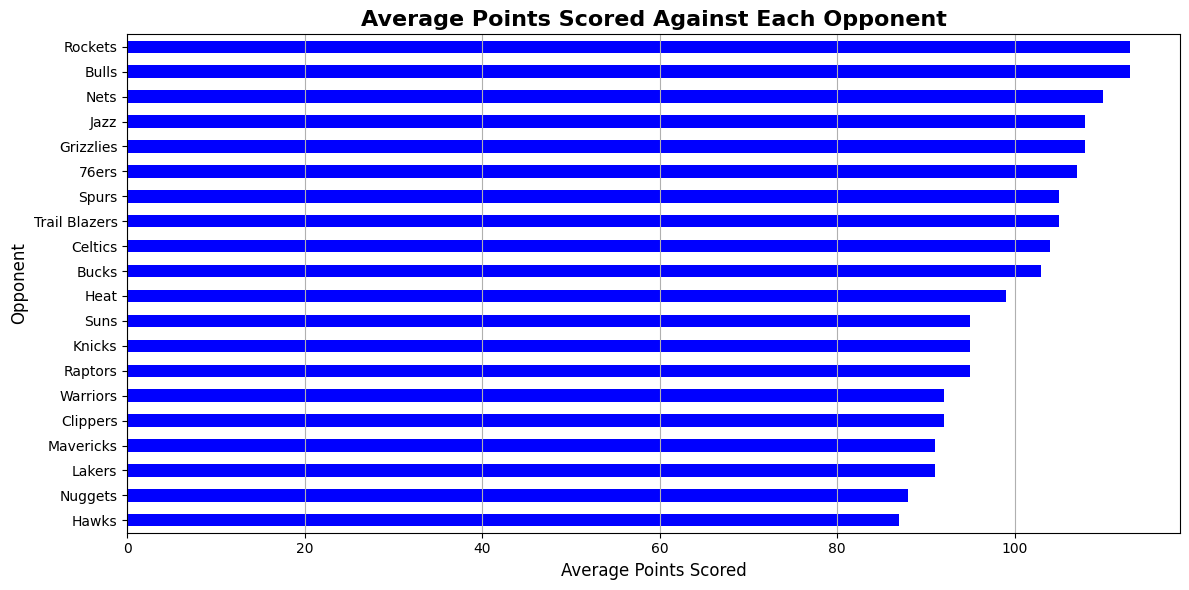

In [18]:
plt.figure(figsize=(12, 6))
opponent_performance['Avg_Points_Against'].sort_values().plot(kind='barh', color='Blue')
plt.title('Average Points Scored Against Each Opponent', fontsize=16, fontweight='bold')
plt.xlabel('Average Points Scored', fontsize=12)
plt.ylabel('Opponent', fontsize=12)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

6


 Average Attendance by Opponent:
   Knicks: 2475 average attendance
   Nets: 2457 average attendance
   Spurs: 2457 average attendance
   76ers: 2375 average attendance
   Jazz: 2331 average attendance
   Grizzlies: 2318 average attendance
   Warriors: 2282 average attendance
   Heat: 2199 average attendance
   Mavericks: 2186 average attendance
   Celtics: 2181 average attendance
   Hawks: 2146 average attendance
   Raptors: 2066 average attendance
   Bucks: 2062 average attendance
   Lakers: 2010 average attendance
   Trail Blazers: 2004 average attendance
   Clippers: 1984 average attendance
   Bulls: 1975 average attendance
   Suns: 1743 average attendance
   Rockets: 1689 average attendance
   Nuggets: 1630 average attendance


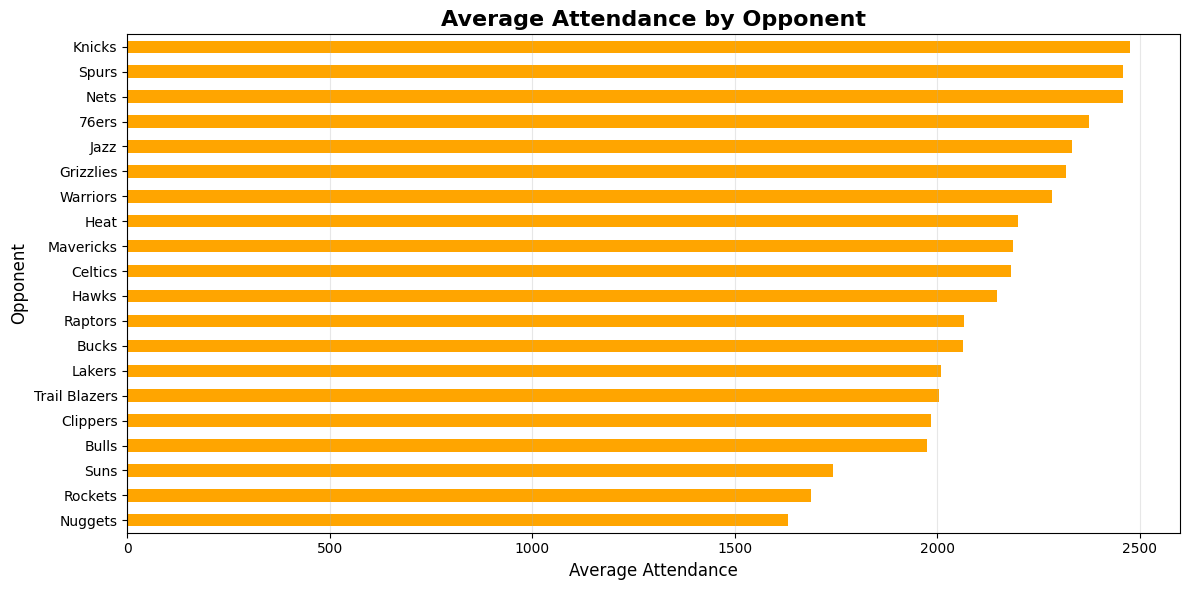

In [19]:
opponent_attendance = games_df.groupby('Opponent')['Attendance'].mean().sort_values(ascending=False)

print(f"\n Average Attendance by Opponent:")
for opponent, attendance in opponent_attendance.items():
    print(f"   {opponent}: {attendance:.0f} average attendance")

plt.figure(figsize=(12, 6))
opponent_attendance.sort_values().plot(kind='barh', color='orange')
plt.title('Average Attendance by Opponent', fontsize=16, fontweight='bold')
plt.xlabel('Average Attendance', fontsize=12)
plt.ylabel('Opponent', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

7


 Win-Loss Record vs Points Scored:
   Loss: 9 games, 92.2 avg points
   Tie: 1 games, 108.0 avg points
   Win: 10 games, 106.3 avg points


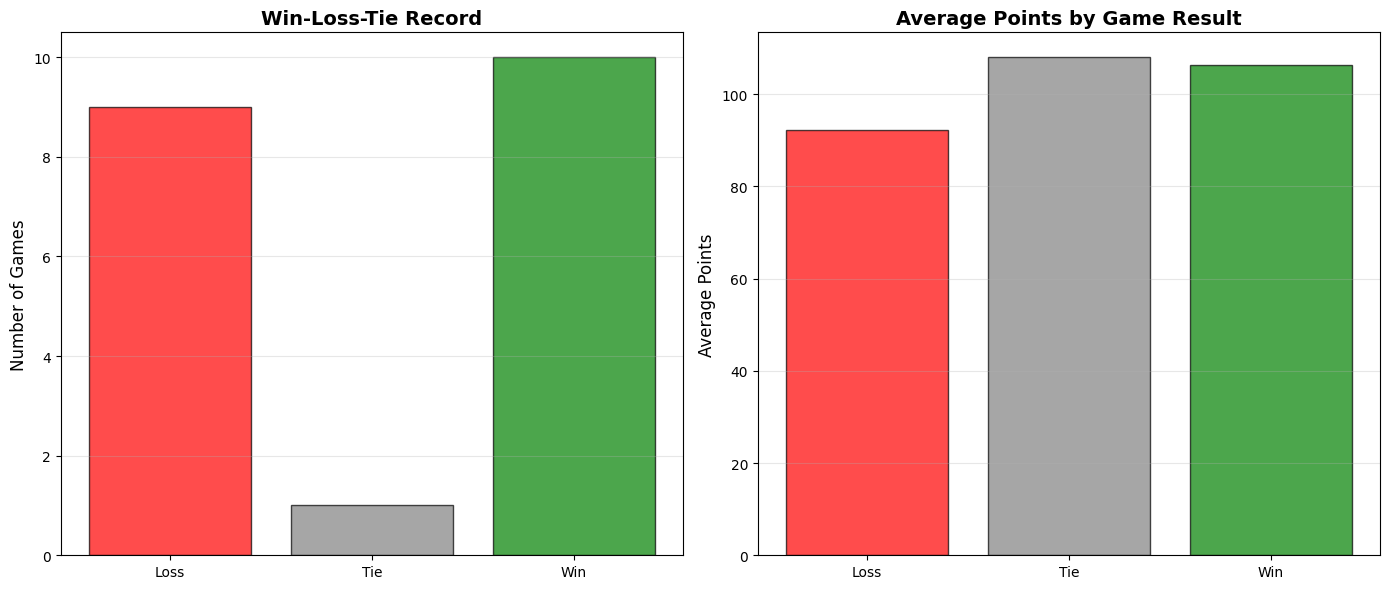

In [21]:
win_loss_stats = games_df.groupby('Result').agg({
    'Team_Points': ['count', 'mean'],
    'Game_ID': 'count'
}).round(1)

win_loss_stats.columns = ['Games_Count', 'Avg_Points', 'Total_Games']
win_loss_stats = win_loss_stats.reset_index()

print(f"\n Win-Loss Record vs Points Scored:")
for _,row in win_loss_stats.iterrows():
    print(f"   {row['Result']}: {row['Games_Count']} games, {row['Avg_Points']} avg points")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

results = win_loss_stats['Result']
game_counts = win_loss_stats['Games_Count']
colors = ['green' if result == 'Win' else 'red' if result == 'Loss' else 'gray' for result in results]

ax1.bar(results, game_counts, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Win-Loss-Tie Record', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Games', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

avg_points = win_loss_stats['Avg_Points']
ax2.bar(results, avg_points, color=colors, alpha=0.7, edgecolor='black')
ax2.set_title('Average Points by Game Result', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Points', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()